# Requires

Gadfly, Winston, Images from Julia
and ImageMagick from your system.

# O Método de Newton para Minimização e um Fractal a Respeito

### Abel Soares Siqueira - abelsiqueira@ufpr.br

##### Seminários Poincaré - 20 de Novembro de 2015

# Equações não-lineares

O problema de equações não-lineares, consiste em achar uma tupla
de valores que satisfaz um conjunto de equações.

$$ \left\{\begin{array}{rcl}
x_1^2 + x_2^2 & = & 4 \\
x_1x_2 & = & 1
\end{array}\right.
$$

$$ \left\{\begin{array}{rcl}
x_1^2 + x_2^2 - e^{x_1+x_2} & = & 1 \\
\sqrt{1+x_2} + \frac{1}{x_2^2+1} & = & 1
\end{array}\right.
$$

$$ \left\{\begin{array}{rcl}
x_1x_2x_3 & = & 1 \\
x_1x_2 + x_1x_3 + x_2x_3 & = & 3 \\
x_1 + x_2 + x_3 & = & 3
\end{array}\right.
$$

De maneira geral escrevemos $ F(x) = 0 $, onde $ F:\mathbb{R}^n \rightarrow \mathbb{R}^n $.

$$ \left\{\begin{array}{rcl}
x_1^2 + x_2^2 & = & 4 \\
x_1x_2 & = & 1
\end{array}\right. \qquad \Rightarrow \qquad
F(x) = \left[\begin{array}{c}
x_1^2 + x_2^2 - 4 \\
x_1x_2 - 1
\end{array}\right].
$$

## Graficamente

$$ \left\{\begin{array}{rcl}
x_1^2 + x_2^2 & = & 4 \\
x_1x_2 & = & 1
\end{array}\right. $$

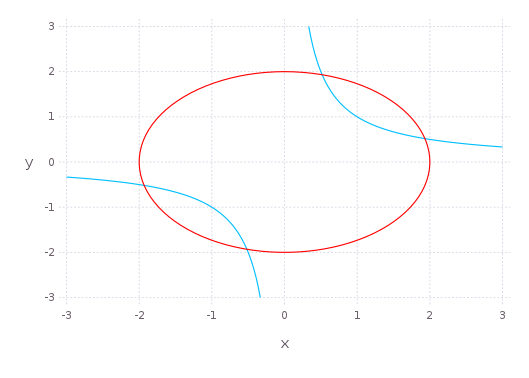

In [182]:
using Gadfly

set_default_plot_size(14cm, 10cm)

t = linspace(-2.9, 2.9, 100)
t = linspace(0, 2pi, 100)
x = linspace(1/3, 3, 100); y = 1./x;
Gadfly.plot(layer(x = 2*sin(t), y = 2*cos(t), Geom.path, Theme(default_color=colorant"red")),
layer(x=x, y=y, Geom.path),
layer(x=-x, y=-y, Geom.path))

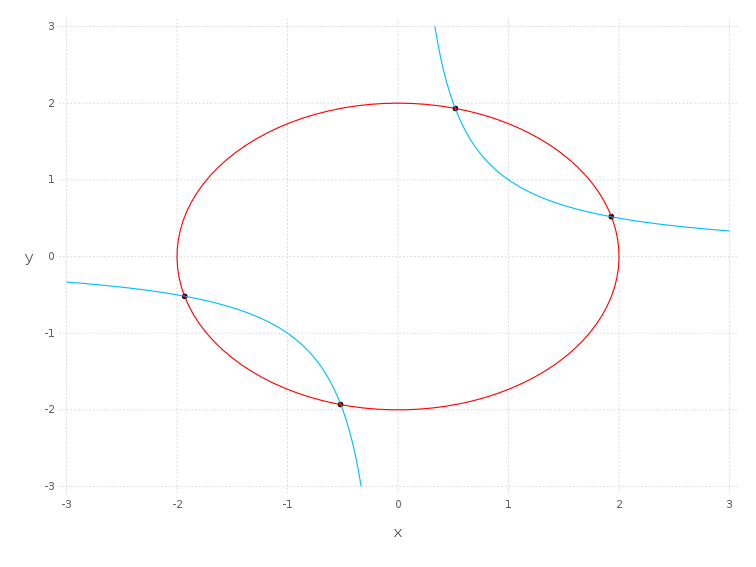

In [172]:
t = linspace(-2.9, 2.9, 100)
t = linspace(0, 2pi, 100)
x = linspace(1/3, 3, 100); y = 1./x;
Gadfly.plot(layer(x = 2*sin(t), y = 2*cos(t), Geom.path, Theme(default_color=colorant"red")),
layer(x=x, y=y, Geom.path),
layer(x=-x, y=-y, Geom.path),
layer(x=[1.93;0.52;-1.93;-0.52], y=[0.52;1.93;-0.52;-1.93], Geom.point, Theme(default_color=colorant"black")))

## Aproximação Linear

Sendo $F$ diferenciável, definimos sua aproximação linear
$$ F(x) \approx L(x) = F(a) + F'(a)(x-a) $$
que satisfaz
$$ F(a) = L(a) \qquad F'(a) = L'(a) $$

Para
$$ F(x) = \left[\begin{array}{c}
x_1^2 + x_2^2 -4 \\ x_1x_2 -1
\end{array}\right]
\qquad
F'(x) = \left[\begin{array}{cc}
2x_1 & 2x_2 \\ x_2 & x_1
\end{array}\right]
$$

Para $a = (2,1)$.
$$ F(a) = \left[\begin{array}{c}
1 \\ 1
\end{array}\right]
\qquad
F'(a) = \left[\begin{array}{cc}
4 & 2 \\ 1 & 2
\end{array}\right]
$$
$$ L(x) = \left[\begin{array}{c}
4x_1 + 2x_2 - 9 \\ x_1 + 2x_2 - 3
\end{array}\right] $$

Agora resolvemos $L(x) = 0$.

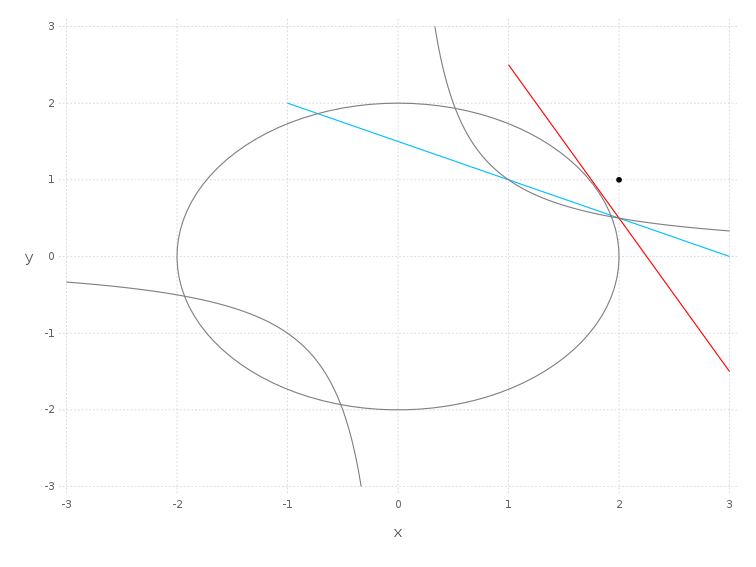

In [174]:
using Gadfly

t = linspace(-2.9, 2.9, 100)
t = linspace(0, 2pi, 100)
x = linspace(1/3, 3, 100); y = 1./x;
Gadfly.plot(layer(x = 2*sin(t), y = 2*cos(t), Geom.path, Theme(default_color=colorant"gray")),
layer(x=x, y=y, Geom.path, Theme(default_color=colorant"gray")),
layer(x=-x, y=-y, Geom.path, Theme(default_color=colorant"gray")),
layer(x=[1;3], y=(9-4*[1;3])/2, Geom.path, Theme(default_color=colorant"red")),
layer(x=[-1;3], y=(3-[-1;3])/2, Geom.path),
layer(x=[2], y=[1], Geom.point, Theme(default_color=colorant"black")))

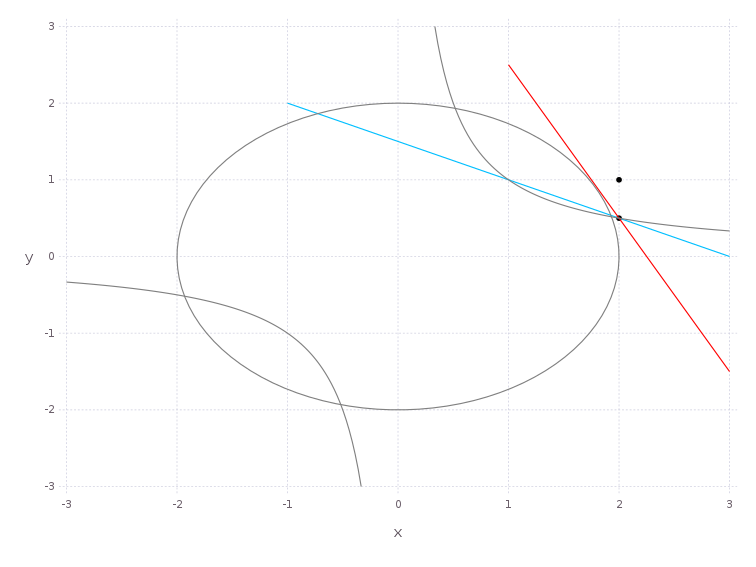

In [175]:
using Gadfly

t = linspace(-2.9, 2.9, 100)
t = linspace(0, 2pi, 100)
x = linspace(1/3, 3, 100); y = 1./x;
Gadfly.plot(layer(x = 2*sin(t), y = 2*cos(t), Geom.path, Theme(default_color=colorant"gray")),
layer(x=x, y=y, Geom.path, Theme(default_color=colorant"gray")),
layer(x=-x, y=-y, Geom.path, Theme(default_color=colorant"gray")),
layer(x=[1;3], y=(9-4*[1;3])/2, Geom.path, Theme(default_color=colorant"red")),
layer(x=[-1;3], y=(3-[-1;3])/2, Geom.path),
layer(x=[2;2], y=[1;0.5], Geom.point, Theme(default_color=colorant"black")))

## O método de Newton

  1. Dado $x^0$, faça $k = 0$
  2. Encontre $L_k$, aproximação linear de $F$ em torno do ponto $x^k$
  3. Defina $x^{k+1}$ como a solução de $L_k(x) = 0$
  4. Incremente $k$ e volte ao passo 2

$$ L_k(x) = F(x^k) + F'(x^k)(x-x^k) $$

$$ L_k(x^{k+1}) = 0 \Rightarrow
F(x^k) + F'(x^k)(x^{k+1}-x^k) = 0. $$

$$ x^{k+1} = x^k - [F'(x^k)]^{-1}F(x^k). $$

$$ d^k = - [F'(x^k)]^{-1}F(x^k) \qquad x^{k+1} = x^k + d^k. $$

## O método de Newton

  1. Dado $x^0$, faça $k = 0$
  2. Faça $x^{k+1} = x^k - [F'(x^k)]^{-1}F(x^k)$
  3. Incremente $k$ e volte ao passo 2

In [109]:
F(x) = [x[1]^2+x[2]^2-4; x[1]*x[2]-1];
J(x) = [2*x[1] 2*x[2]; x[2] x[1]];
x = [2.0; 1.0];

In [176]:
x = [2.0;1.0];
rnd(x) = round(x,5)
println("x = $(rnd(x)), F(x) = $(F(x))")
x = x - J(x)\F(x)
println("x = $(rnd(x)), F(x) = $(rnd(F(x)))")
x = x - J(x)\F(x)
println("x = $(rnd(x)), F(x) = $(rnd(F(x)))")
x = x - J(x)\F(x)
println("x = $(rnd(x)), F(x) = $(rnd(F(x)))")

x = [2.0,1.0], F(x) = [1.0,1.0]
x = [2.0,0.5], F(x) = [0.25,0.0]
x = [1.93333,0.51667], F(x) = [0.00472,-0.00111]
x = [1.93185,0.51764], F(x) = [0.0,-0.0]


### Em uma dimensão

No caso particular $n = 1$, o método se reduz a achar o zero de uma função $F$,
e sua interpretação geométrica fica ainda mais simples.


Vejamos $$f(x) = xe^x - 1,$$ com $x^0 = 0.2$.

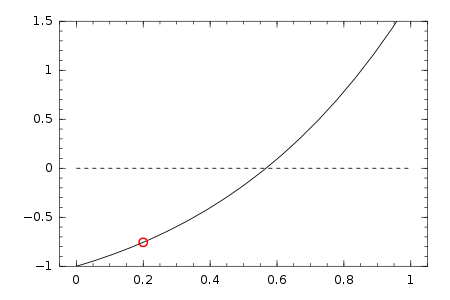

In [177]:
f(x) = exp(x).*x - 1
fd(x) = exp(x) + x*exp(x)
x = 0.2
fplot(f, [0,1])
oplot([0.0;1.0], [0.0;0.0], "--")
oplot([x], [f(x)], "ro")
ylim([-1,1.5])

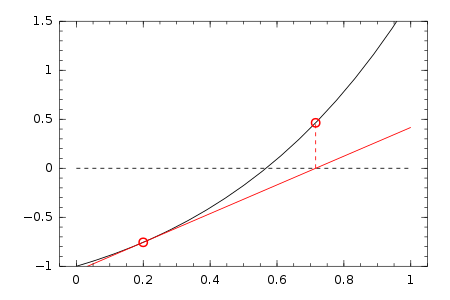

In [112]:
fplot(f, [0,1])
oplot([0.0;1.0], [0.0;0.0], "--")
oplot([x], [f(x)], "ro")
xn = x - f(x)/fd(x)
oplot([0;1], f(x)+fd(x)*([0;1]-x), "r")
oplot([xn;xn], [0;f(xn)], "r--")
oplot([xn], [f(xn)], "ro")
ylim([-1,1.5])

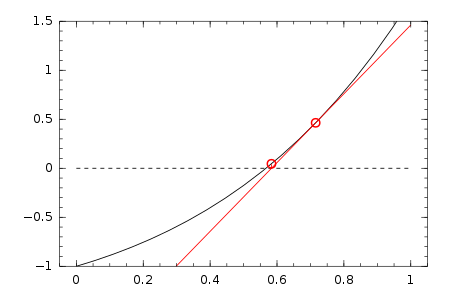

In [113]:
x = xn
fplot(f, [0,1])
oplot([0.0;1.0], [0.0;0.0], "--")
oplot([x], [f(x)], "ro")
xn = x - f(x)/fd(x)
oplot([0;1], f(x)+fd(x)*([0;1]-x), "r")
oplot([xn;xn], [0;f(xn)], "r--")
oplot([xn], [f(xn)], "ro")
ylim([-1,1.5])

## Problemas

  - $F'(x^k)$ tem inversa?

  - $F(x) = 0$ pode não ter solução única.

  - Se $x^0$ estiver perto o suficiente de uma solução, existe garantia de que o método converge para essa solução?

**SIM**! Caso algumas condições sejam satisfeitas. Infelizmente não sabemos *quão* perto.

### Convergência

Por exemplo, $F(x) = x^2 - 1$.

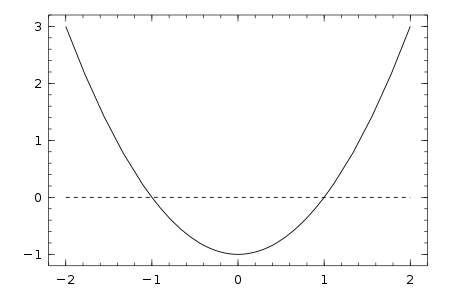

In [114]:
Winston.fplot(x->x.^2-1, [-2,2])
oplot([-2;2], [0.0;0.0], "--")

  - Se $x^0 > 0$, então $x^k$ gerada pelo Método de Newton converge para $x^* = 1$.

  - Se $x^0 < 0$, então $x^k$ gerada pelo Método de Newton converge para $x^* = -1$.

  - Se $x^0 = 0$, o método falha.

No entanto, para $f(x) = x^3 - x$ já é mais complicado.

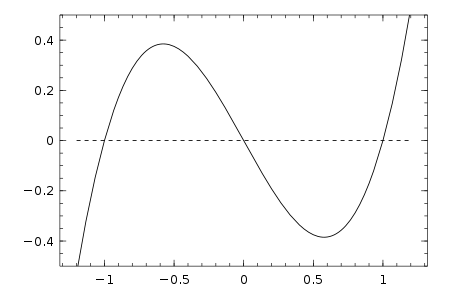

In [115]:
fplot(x->x^3-x, [-1.2,1.2])
oplot([-1.2;1.2], [0.0;0.0], "--")
ylim([-0.5;0.5])

  - Se $x^0 > \sqrt{3}/3$, então $x^k \rightarrow 1$

  - Se $x^0 < -\sqrt{3}/3$, então $x^k \rightarrow -1$

  - Se $\vert x^0\vert < \sqrt{5}/5$, então $x^k \rightarrow 0$

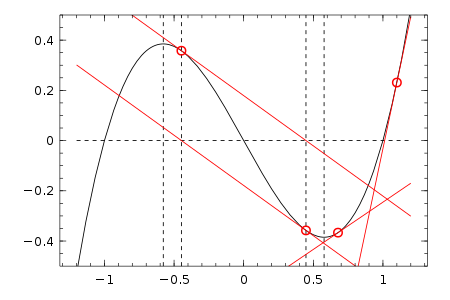

In [116]:
f(x) = x^3-x
fd(x) = 3*x^2-1
r = sqrt(3)/3
s = sqrt(5)/5
fplot(x->f(x), [-1.2,1.2])
oplot([-1.2;1.2], [0.0;0.0], "--")
oplot([r;r], [-0.5;0.5], "--")
oplot([-r;-r], [-0.5;0.5], "--")
oplot([s;s], [-0.5;0.5], "--")
oplot([-s;-s], [-0.5;0.5], "--")

for x in [s;-s;r+0.1;1.1] 
    oplot([x], [f(x)], "ro")
    oplot([-1.2;1.2], f(x) + fd(x)*([-1.2;1.2]-x), "r")
end
ylim([-0.5;0.5])

In [117]:
function newton_exemplo(a)
    x = copy(a)
    f(x) = x^3 - x
    fd(x) = 3*x^2 - 1
    while abs(f(x)) > 1e-6
        if abs(fd(x)) < 1e-6
            println("$a vai pra um ponto muito próximo de tangente horizontal"); break
        elseif x > sqrt(3)/3
            println("$a --> 1.0"); break
        elseif x < -sqrt(3)/3
            println("-1.0 <-- $a"); break
        elseif abs(x) < sqrt(5)/5
            println("$a vai pra 0.0"); break
        end
        x = x - f(x)/fd(x)
    end
end

newton_exemplo (generic function with 1 method)

In [179]:
for a in linspace(-2,2,21)
    newton_exemplo(a)
end

-1.0 <-- -2.0
-1.0 <-- -1.8
-1.0 <-- -1.6
-1.0 <-- -1.4
-1.0 <-- -1.2
-1.0 <-- -0.8
-1.0 <-- -0.6
-0.4 vai pra 0.0
-0.2 vai pra 0.0
0.2 vai pra 0.0
0.4 vai pra 0.0
0.6 --> 1.0
0.8 --> 1.0
1.2 --> 1.0
1.4 --> 1.0
1.6 --> 1.0
1.8 --> 1.0
2.0 --> 1.0


No entanto, o que acontece no intervalo $(\sqrt{5}/5,\sqrt{3}/3)$ não é trivial.

In [166]:
a = sqrt(3 )/3; b = sqrt(5)/5
while a > b + 1e-12
    newton_exemplo(a)
    a = b + (a-b)/2
end

0.5773502691896257 vai pra um ponto muito próximo de tangente horizontal
-1.0 <-- 0.5122819323447918
-1.0 <-- 0.4797477639223749
0.46348067971116647 --> 1.0
0.4553471376055622 --> 1.0
0.4512803665527601 --> 1.0
-1.0 <-- 0.44924698102635907
-1.0 <-- 0.4482302882631585
-1.0 <-- 0.4477219418815582
0.4474677686907581 --> 1.0
0.44734068209535804 --> 1.0
-1.0 <-- 0.447277138797658
-1.0 <-- 0.447245367148808
-1.0 <-- 0.447229481324383
0.4472215384121705 --> 1.0
0.44721756695606424 --> 1.0
-1.0 <-- 0.4472155812280111
-1.0 <-- 0.44721458836398453
-1.0 <-- 0.44721409193197126
0.4472138437159646 --> 1.0
0.4472137196079613 --> 1.0
-1.0 <-- 0.44721365755395964
-1.0 <-- 0.44721362652695884
-1.0 <-- 0.4472136110134584
0.4472136032567082 --> 1.0
0.4472135993783331 --> 1.0
0.44721359743914557 --> 1.0
-1.0 <-- 0.4472135964695518
-1.0 <-- 0.44721359598475485
0.4472135957423564 --> 1.0
0.4472135956211572 --> 1.0
0.4472135955605576 --> 1.0
-1.0 <-- 0.4472135955302578
-1.0 <-- 0.44721359551510786
0.44721359

Arbitrarimente próximo de $\sqrt{5}/5$ pela direita temos pontos que convergem para 1.0 ou para -1.0.

Vamos classificar os pontos iniciais de acordo com a solução encontrada pelo método,
mas para ficar visualmente intrigante, vamos considerar o problema em duas dimensões.

A função a seguir recebe $F$, $J$, um retângulo $[a,b]\times [c,d]$ discretizado
e a lista das raízes da função $F$,
e retorna uma matriz de classificação para cada ponto nesse retângulo.
Com essa matriz, vamos pintar o pixel correspondende de acordo com a raiz para qual
o método convergiu, usando vermelho para a primeira raiz, verde para a segunda,
e assim por diante.

In [139]:
function fractal(F, J, xm, xM, roots;
        W = 640, H = 640, ϵ = 1e-2, max_iter = 100)
    M = zeros(Int, W, H)
    N = size(roots, 2)
    d = zeros(2)
    for (i,a) = enumerate(linspace(xm[1], xM[1], W))
        for (j,b) = enumerate(linspace(xm[2], xM[2], H))
            x,y = a,b
            iter = 0
            while norm(F(x,y)) > ϵ
                try
                    d = -J(x,y)\F(x,y)
                catch
                    break
                end
                x += d[1]
                y += d[2]
                iter += 1
                if iter >= max_iter
                    break
                end
            end
            if norm(F(x,y)) < ϵ
                M[i,j] = indmin( [norm(roots[:,k]-[x;y]) for k=1:N] )
            end
        end
    end
    return M
end

fractal (generic function with 1 method)

In [141]:
using Images

function frac_save(M, filename)
    (m,n) = size(M)
    img = zeros(n, m, 3)
    for i = 1:m
        for j = 1:n
            img[j, i, 1] = ( M[i,j] % 2 )
            img[j, i, 2] = ( div(M[i,j], 2) ) % 2
            img[j, i, 3] = ( div(M[i,j], 4) ) % 2
        end
    end
    imwrite(Images.colorim(img), filename);
end

frac_save (generic function with 1 method)

Voltando no nosso exemplo
$$ \left\{\begin{array}{rcl}
x_1^2 + x_2^2 & = & 4 \\
x_1x_2 & = & 1
\end{array}\right.
$$
temos as raízes $(r,s)$, $(s,r)$, $(-r,-s)$ e $(-s,-r)$,
onde $r = \sqrt{2+\sqrt{3}}$ e $s = \sqrt{2-\sqrt{3}}$.

In [140]:
F(x,y) = [x^2+y^2-4; x*y-1]
J(x,y) = [2*x 2*y; y x]
r,s = sqrt(2+sqrt(3)), sqrt(2-sqrt(3))
roots = [r s -r -s; s r -s -r]
M = fractal(F, J, (-2.0,-2.0), (2.0,2.0), roots);

In [142]:
frac_save(M, "ex1.png");

Vamos considerar agora a equação mais famosa desse assunto.
Seja $z \in \mathcal{C}$. Buscamos as soluções de
$$ z^3 = 1. $$
Podemos escrever $z = x + iy$, com $x, y \in \mathbb{R}$, e
expandir essa expressão obtendo
$$ (x^3 - 3xy^2 - 1) + (3x^2y - y^3)i = 0. $$
Daí, um número complexo é nulo se, e somente se cada componente sua é nula.
Então, obtemos o sistema
$$ \left\{\begin{array}{rcl}
x^3 - 3xy^2 & = & 1\\
3x^2y - y^3 & = & 0
\end{array}\right. $$

In [143]:
F(x,y) = [x^3-3*x*y^2-1;3*x^2*y-y^3]
J(x,y) = [3*x^2-3*y^2 -6*x*y; 6*x*y 3*x^2-3*y^2]
roots = [cos([0 2*pi/3 4*pi/3]); sin([0 2*pi/3 4*pi/3])]
M = fractal(F, J, (-2.0,-2.0), (2.0,2.0), roots);
frac_save(M, "ex2.png")

In [144]:
function fractal2(F, J, xm, xM, roots;
        W = 640, H = 640, ϵ = 1e-2, max_iter = 20)
    M = zeros(Int, W, H)
    I = zeros(Int, W, H)
    N = size(roots, 2)
    d = zeros(2)
    iter = 0
    for (i,a) = enumerate(linspace(xm[1], xM[1], W))
        for (j,b) = enumerate(linspace(xm[2], xM[2], H))
            x,y = a,b
            iter = 0
            while norm(F(x,y)) > ϵ
                try
                    d = -J(x,y)\F(x,y)
                catch
                    break
                end
                x += d[1]
                y += d[2]
                iter += 1
                if iter >= max_iter
                    break
                end
            end
            if norm(F(x,y)) < ϵ
                M[i,j] = indmin( [norm(roots[:,k]-[x;y]) for k=1:N] )
            end
            I[i,j] = iter
        end
    end
    return M, I
end

fractal2 (generic function with 1 method)

In [145]:
function frac_save2(M, I, filename)
    (m,n) = size(M)
    img = zeros(n, m, 3)
    max_iter = maximum(I)
    for i = 1:m
        for j = 1:n
            img[j, i, 1] = ( M[i,j] % 2 )*(max_iter-I[i,j])/max_iter
            img[j, i, 2] = ( div(M[i,j], 2) % 2 )*(max_iter-I[i,j])/max_iter
            img[j, i, 3] = ( div(M[i,j], 4) % 2 )*(max_iter-I[i,j])/max_iter
        end
    end
    imwrite(Images.colorim(img), filename);
end

frac_save2 (generic function with 1 method)

In [146]:
F(x,y) = [x^3-3*x*y^2-1;3*x^2*y-y^3]
J(x,y) = [3*x^2-3*y^2 -6*x*y; 6*x*y 3*x^2-3*y^2]
roots = [cos([0 2*pi/3 4*pi/3]); sin([0 2*pi/3 4*pi/3])]
M, I = fractal2(F, J, (-2.0,-2.0), (2.0,2.0), roots);
frac_save2(M, I, "ex3.png")

In [147]:
F(x,y) = [x*(y - x^2); (x^2-1)*(y+1)]
J(x,y) = [y-3*x^2 x; 2x*(y+1) x^2-1w
roots = [0.0 1.0 -1.0; -1.0 1.0 1.0]
M, I = fractal2(F, J, (-2.0,-2.0), (2.0,2.0), roots);
frac_save2(M, I, "ex4.png")

$$ z^4 = 1. $$

In [150]:
F(x,y) = [x^4-6*x^2*y^2+y^4-1; -4*x^3*y+4*x*y^3]
J(x,y) = [4*x^3-12*x*y^2 -12*x^2*y+4*y^3; -12*x^2*y+4*y^3 -4*x^3+12*x*y^2]
roots = [1.0 0.0 -1.0 0.0; 0.0 1.0 0.0 -1.0]
M, I = fractal2(F, J, (-2.0,-2.0), (2.0,2.0), roots);
frac_save2(M, I, "ex5.png")

## Otimização

$$ \min f(x) \qquad f:\mathbb{R}^n\rightarrow\mathbb{R}, \quad f \in C^2 $$

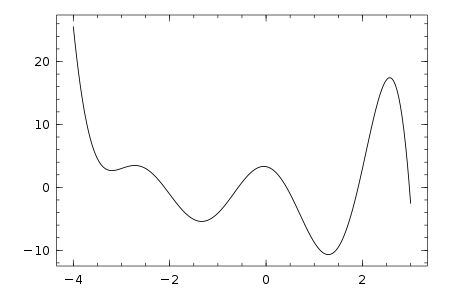

In [129]:
using Winston
f(x) = (x-2).*(x-0.1).*(x+2.5).*(x+3).*sin(x+0.2) + 3
t = linspace(-4,3,200)
Winston.plot(t, f(t))

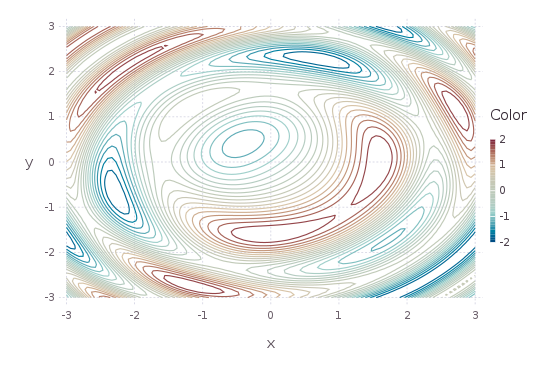

In [130]:
f(x,y) = sin(x-y) + sin(x^2+y^2-1)
x = linspace(-3,3,100); y = linspace(-3,3,100);
Gadfly.plot(x=x, y=y, z=(x,y)->f(x,y), Geom.contour(levels=20))

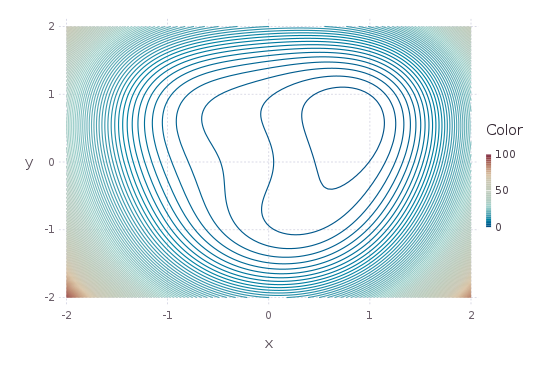

In [131]:
a = 16
f(x,y) = (x^2 + y^2-1)^2 + (y - x^2)^2 + (x-1)^2
x = linspace(-2,2,100); y = linspace(-2,2,100);
Gadfly.plot(x=x, y=y, z=(x,y)->f(x,y), Geom.contour(levels=100))

  - CN1: Se $x^*$ é minimizador local de $f$, então $\nabla f(x^*) = 0$.
  - CN2: Se $x^*$ é minimizador local de $f$, então $\nabla f(x^*) = 0$ e $\nabla^2 f(x^*)$ é semidefinida positiva.
  - CS2: Se $\nabla f(x^*) = 0$ e $\nabla^2 f(x^2)$ é definida positiva, então $x^*$ é minimizador local estrito.

Podemos aplicar o método de Newton para $F(x) = \nabla f(x)$.
$$ F'(x) = \nabla^2 f(x) $$

$$ \nabla^2 f(x^k)d^k = -\nabla f(x^k) \qquad x^{k+1} = x^k + d^k $$

$$ \nabla^2 f(x^k)d + \nabla f(x^k) = 0 = \nabla m_k(d). $$

$$ m_k(d) = \frac{1}{2}d^T \nabla^2 f(x^k)d + \nabla f(x^k)^Td + f(x^k) $$

$$ d^k = \arg\min_d \quad m_k(d) $$
$$ x^{k+1} = \arg\min_x \quad m(x-x^k). $$

### Rosenbrock

$$ f(x) = (1 - x_1)^2 + 4(x_2-x_1^2)^2. $$

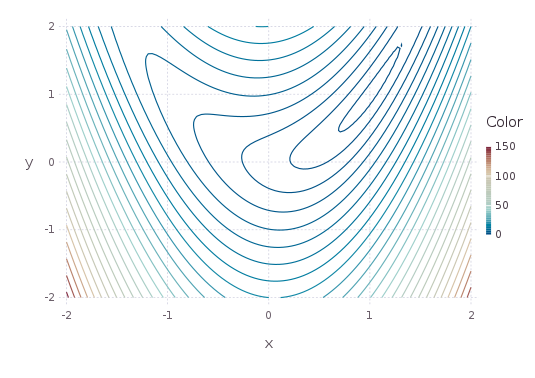

In [132]:
f(x,y) = (1-x)^2 + 4*(y-x^2)^2
x = linspace(-2,2,100); y = linspace(-2,2,100);
lvls = 0.1*linspace(1,150,100).^2;
Gadfly.plot(x=x, y=y, z=(x,y)->f(x,y), Geom.contour(levels=lvls))

$$ x^0 = (-0.5, 0.0) $$

In [133]:
∇f(x,y) = [-2*(1-x)-16*x*(y-x^2); 8*(y-x^2)]
H(x,y) = [2+48*x^2-16*y  -16*x; -16*x 8]
m(d,x,y) = 0.5*dot(d, H(x,y)*d) + dot(∇f(x,y), d) + f(x,y)
x₀, y₀ = -0.5, 0.0;

In [155]:
function plot(x₀, y₀)
    f₀ = f(x₀, y₀); s = -H(x₀,y₀)\ ∇f(x₀,y₀); fs = f(x₀+s[1],y₀+s[2]);
    qlvls = fs + (f₀-fs)*( 1.5.^collect(-10:10) )
    Gadfly.plot(
    layer(x=x, y=y, z=(x,y)->f(x,y), Geom.contour(levels=[f₀])),
    layer(x=x, y=y, z=(x,y)->m([x-x₀;y-y₀], x₀, y₀), Geom.contour(levels=qlvls)),
    layer(x=[x₀], y=[y₀], Geom.point))
end

plot (generic function with 1 method)

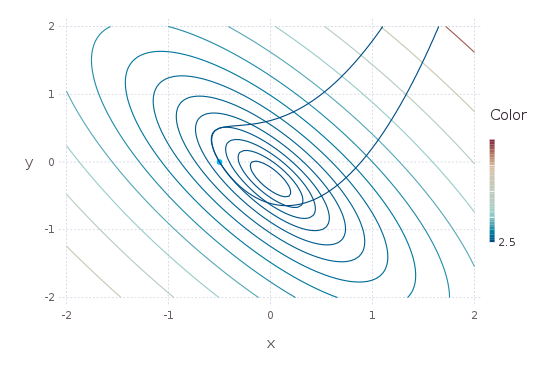

In [156]:
plot(x₀, y₀)

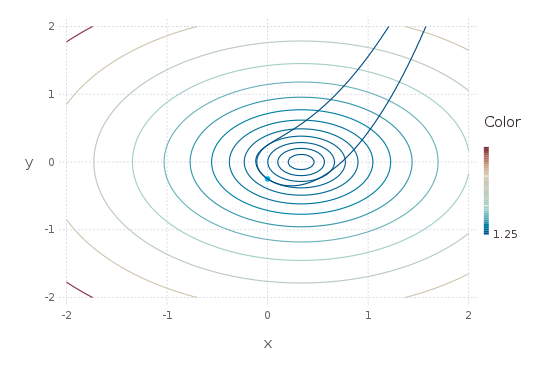

In [157]:
d = -H(x₀,y₀) \ ∇f(x₀,y₀);
x₁, y₁ = x₀ + d[1], y₀ + d[2];
plot(x₁, y₁)

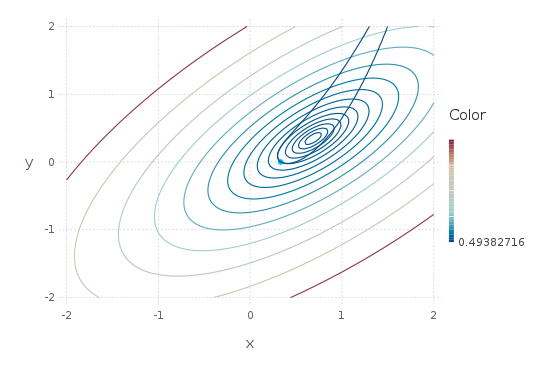

In [158]:
d = -H(x₁,y₁) \ ∇f(x₁,y₁);
x₂, y₂ = x₁ + d[1], y₁ + d[2];
plot(x₂, y₂)

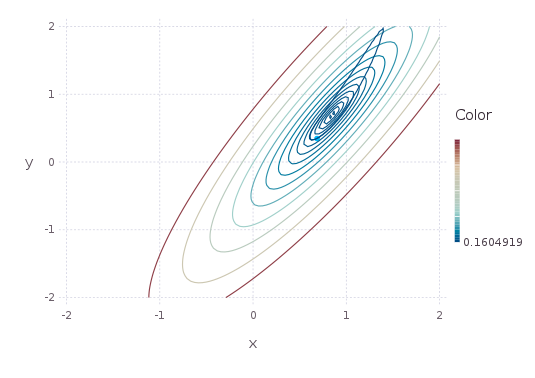

In [159]:
d = -H(x₂,y₂) \ ∇f(x₂,y₂);
x₃, y₃ = x₂ + d[1], y₂ + d[2];
plot(x₃, y₃)

In [ ]:
function fractal_min(f, g, H, xm, xM, roots;
        W = 640, H = 640, ϵ = 1e-2, max_iter = 20)
    M = zeros(Int, W, H)
    I = zeros(Int, W, H)
    N = size(roots, 2)
    d = zeros(2)
    iter = 0
    for (i,a) = enumerate(linspace(xm[1], xM[1], W))
        for (j,b) = enumerate(linspace(xm[2], xM[2], H))
            x,y = a,b
            iter = 0
            while norm(F(x,y)) > ϵ
                try
                    d = -J(x,y)\F(x,y)
                catch
                    break
                end
                x += d[1]
                y += d[2]
                iter += 1
                if iter >= max_iter
                    break
                end
            end
            if norm(F(x,y)) < ϵ
                M[i,j] = indmin( [norm(roots[:,k]-[x;y]) for k=1:N] )
            end
            I[i,j] = iter
        end
    end
    return M, I
end